<a href="https://colab.research.google.com/github/hayat415/repo/blob/main/CarPrice_Assignment%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [62]:
import pandas as pd
import io
data=pd.read_csv(io.BytesIO(uploaded["CarPrice_Assignment.csv"]))

In [63]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [65]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [67]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras import models,layers,optimizers,utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD 
import seaborn as sns
from keras import regularizers

In [69]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])
data['CarName']=labelencoder.fit_transform(data['CarName'])
data['carbody']=labelencoder.fit_transform(data['carbody'])

In [70]:
data['doornumber']=data['doornumber'].map({'two':2, 'four':4})

In [71]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,4,3,2,0,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,4,3,2,0,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,4,3,2,0,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,4,3,2,0,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [72]:
data['CarName'].unique

<bound method Series.unique of 0        2
1        3
2        1
3        4
4        5
      ... 
200    139
201    138
202    140
203    142
204    143
Name: CarName, Length: 205, dtype: int64>

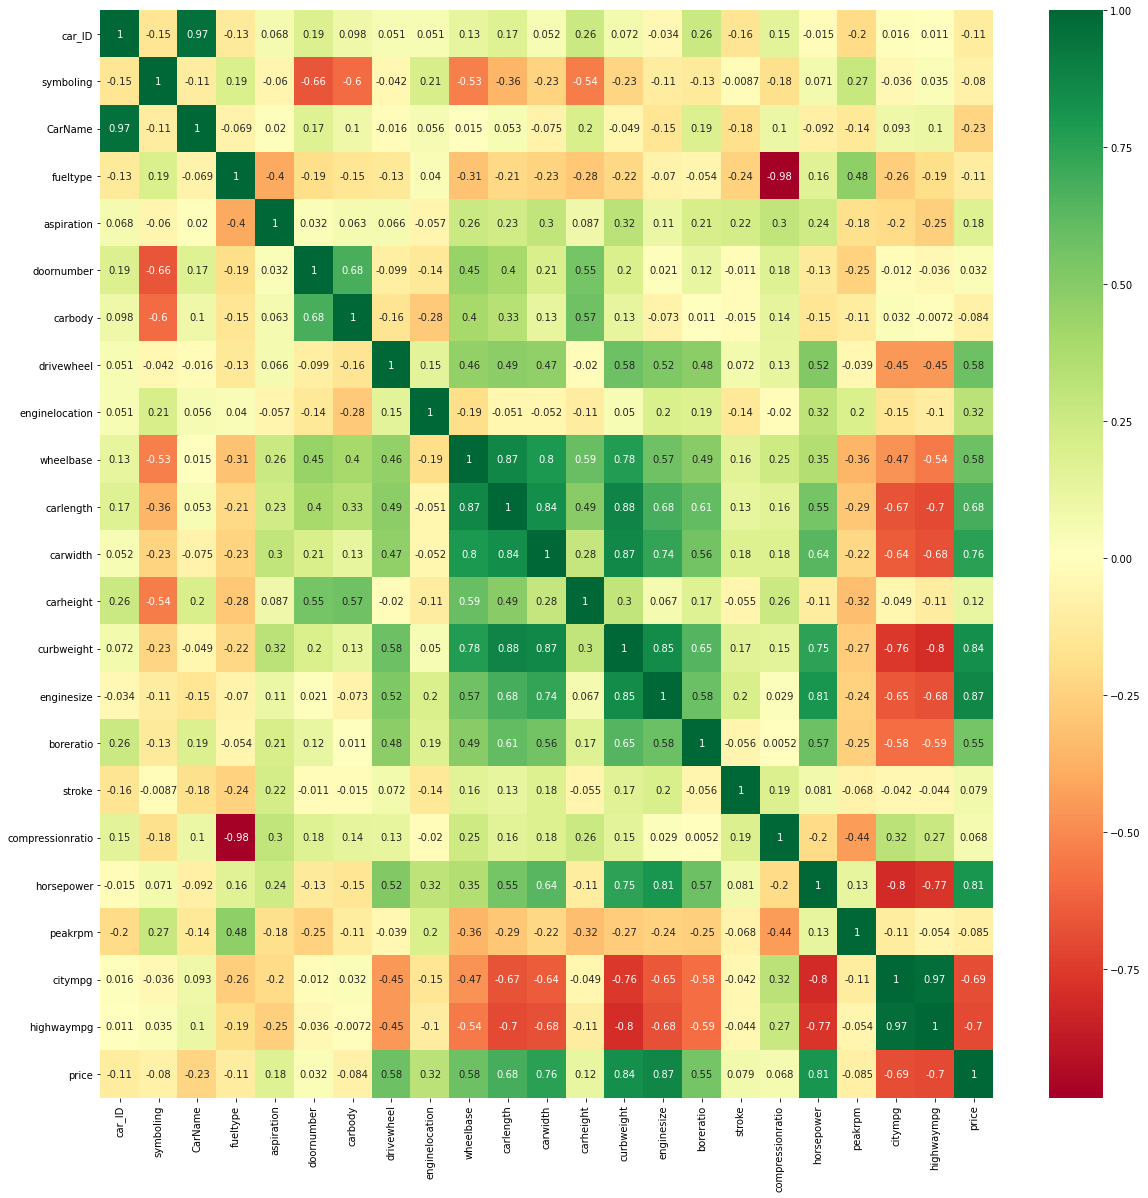

In [75]:
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [81]:
data1=data[['horsepower','boreratio','enginesize', 'curbweight', 'carwidth','carlength','wheelbase', 'drivewheel','price', 'enginelocation']]

In [95]:
data1.shape

(205, 10)

Normalization

In [97]:
max=data1.max()
min=data1.min()
data1=(data1-min)/(max-min)

data1=data1.iloc[:,:-1]

x_labels=data1.iloc[:,-1:]

data1.shape

(205, 9)

Splite data

In [100]:
x=(data1.loc[:, data1.columns!='price'])
y=(data1.loc[:, data1.columns=='price'])
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels,test_labels=train_test_split(x,y, test_size=0.30, random_state=42)



In [102]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

In [105]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, kernel_regularizer=regularizers.l1( l1=0.001), activation = "relu", input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(10,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(8,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(6,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(1))
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [109]:
k= 4
num_val_sample = len(train_data) // k
num_epochs = 100
all_scores = []
all_val_loss_histories = []
all_val_mae_histories = []
all_loss_histories =[]
all_mae_histories = []

for i in range(k):
  print("processing fold #",i)
  val_data = train_data[i*num_val_sample:(i+1)*num_val_sample]
  val_labels = train_labels[i*num_val_sample: (i+1)*num_val_sample]

  partial_train_data=np.concatenate([train_data[:i*num_val_sample], train_data[(i+1)*num_val_sample:]], axis=0)
  partial_train_labels=np.concatenate([train_labels[:i*num_val_sample], train_labels[(i+1)*num_val_sample:]], axis=0)

  model=build_model()
  history = model.fit(partial_train_data, partial_train_labels, validation_data = (val_data, val_labels), epochs= num_epochs, batch_size=1, verbose=0)
  val_loss, val_mae = model.evaluate(test_data, test_labels, verbose=0)
  val_loss_history = history.history["val_loss"]
  val_mae_history = history.history["val_mae"]
  loss_history = history.history["loss"]
  mae_history = history.history["mae"]
  all_loss_histories.append(loss_history)
  all_mae_histories.append(mae_history)
  all_val_loss_histories.append(val_loss_history)
  all_val_mae_histories.append(val_mae_history)
  all_scores.append(val_mae)
ave_val_loss_hist = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
ave_loss_hist = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
ave_val_mae_hist = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]
ave_mae_hist = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
all_scores

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


[0.06466825306415558,
 0.062250714749097824,
 0.060364749282598495,
 0.07341666519641876]

In [ ]:
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_val_loss_hist[:], "bo", label="Validation Loss")
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_loss_hist[:], "b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

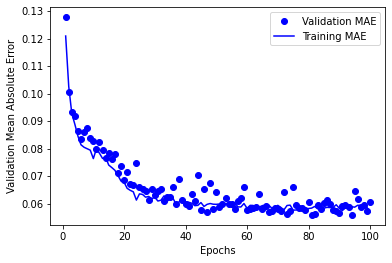

In [110]:
plt.plot(range(1, len(ave_val_mae_hist)+1)[:], ave_val_mae_hist[:], "bo", label="Validation MAE")
plt.plot(range(1, len(ave_val_mae_hist)+1)[:], ave_mae_hist[:], "b", label="Training MAE")
plt.xlabel("Epochs")
plt.ylabel("Validation Mean Absolute Error")
plt.legend()
plt.show()

In [115]:
model = models.Sequential()
model.add(layers.Dense(32, kernel_regularizer=regularizers.l1( l1=0.001), activation = "relu", input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
model.add(layers.Dense(6,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
model.add(layers.Dense(1))
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [111]:
model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0150 - mae: 0.0641
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0147 - mae: 0.0570
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0146 - mae: 0.0579
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0569
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0572
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0146 - mae: 0.0551
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0146 - mae: 0.0579
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0143 - mae: 0.0561
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0144 - mae: 0.0576
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0143 - mae: 0.0566
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0150 

In [116]:
test_mse_scoe, test_mae_score=model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 0.1843 - mae: 0.1008


In [117]:
test_mae_score

0.09851039946079254

In [119]:
prediction=model.predict(test_data)

pred_norm=(prediction*(max[-1]-min[-1]))+min[-1]
test_norm = (test_labels*(max[-1]-min[-1]))+min[-1]